>1 f([-1.63088192]) = -0.71886
>3 f([-1.54670415]) = -0.75073
>4 f([-1.4099456]) = -0.80656
>5 f([-1.35247483]) = -0.83150
>7 f([-1.33538229]) = -0.83909
>9 f([-1.17161944]) = -0.91526
>12 f([-1.08043208]) = -0.95990
>14 f([-0.89798806]) = -1.05071
>15 f([-0.75222555]) = -1.11903
>22 f([-0.6871027]) = -1.14604
>24 f([-0.46322841]) = -1.20472
>25 f([-0.43844987]) = -1.20651
>26 f([-0.40581026]) = -1.20703
>29 f([-0.40820232]) = -1.20707
>35 f([-0.40976238]) = -1.20709
>58 f([-0.41532109]) = -1.20711
Terminado!
f([-0.41532109]) = -1.207106


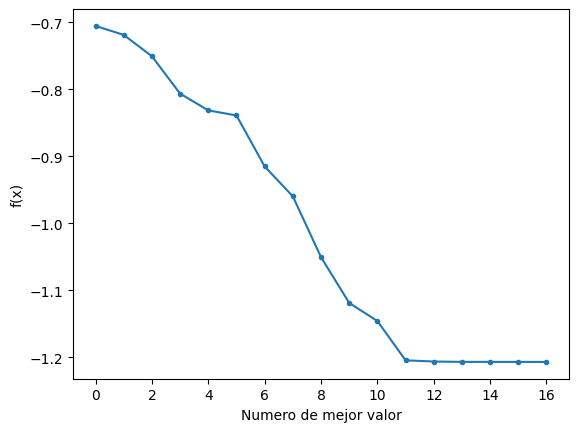

---Tiempo de ejecución: 0.11586189270019531 segundos ---


In [2]:
# hill climbing search de una funcion objetivo en una dimension
#importamos lo necesario
import time
start_time = time.time()
from numpy import asarray
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# definimos la fn objetivo
def objective(x):
	return (x-1)/((x**2)+1) 

# algoritmo hill climb de busqueda local
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generar un punto inicial
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluar la funcion en el punto inicial
	solution_eval = objective(solution)
	# ejecutar el algoritmo
	scores = list()
	scores.append(solution_eval)
	for i in range(n_iterations):
		# Llevar a cabo un paso
		candidate = solution + randn(len(bounds)) * step_size
		# Evaluar el punto despues de dar el paso
		candidte_eval = objective(candidate)
		# revisar si deberiamos conservarlo
		if candidte_eval <= solution_eval:
			# guardar el punto nuevo
			solution, solution_eval = candidate, candidte_eval
			# guardar los resultados
			scores.append(solution_eval)
			# IMprimir el progreso
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval, scores]

# darle la semilla al generador de numeros pseudoaleatorio
seed(5)
# definir el rango de los datos de entrada
bounds = asarray([[-3.0, 3.0]])
# definir el total de iteraciones
n_iterations = 100
# definir el tamaño de paso maximo
step_size = 0.1
# Correr el algoritmo
best, score, scores = hillclimbing(objective, bounds, n_iterations, step_size)
print('Terminado!')
print('f(%s) = %f' % (best, score))
# plotear best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Numero de mejor valor')
pyplot.ylabel('f(x)')
pyplot.show()

print("---Tiempo de ejecución: %s segundos ---" % (time.time() - start_time))

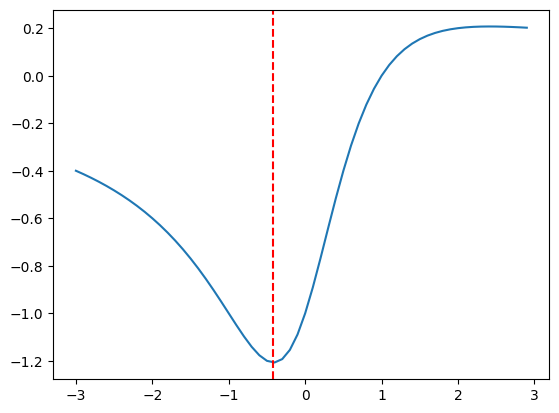

In [7]:
# funcion de optimizacion convexa
from numpy import arange
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/((x[0]**2)+1) 

# definir rango de entrada
r_min, r_max = -3.0, 3.0
# muestrear  los inputs de manera aleatoria cada 0.1 pasos
inputs = arange(r_min, r_max, 0.1)
# calcular objetivos
results = [objective([x]) for x in inputs]
# crear grafica
pyplot.plot(inputs, results)
# definir valor optimo de x
x_optima = 0.0
# dibujar linea en el optimo de x
pyplot.axvline(x=best, ls='--', color='red')
pyplot.show()

>1 f([-1.63088192]) = -0.71886
>3 f([-1.54670415]) = -0.75073
>4 f([-1.4099456]) = -0.80656
>5 f([-1.35247483]) = -0.83150
>7 f([-1.33538229]) = -0.83909
>9 f([-1.17161944]) = -0.91526
>12 f([-1.08043208]) = -0.95990
>14 f([-0.89798806]) = -1.05071
>15 f([-0.75222555]) = -1.11903
>22 f([-0.6871027]) = -1.14604
>24 f([-0.46322841]) = -1.20472
>25 f([-0.43844987]) = -1.20651
>26 f([-0.40581026]) = -1.20703
>29 f([-0.40820232]) = -1.20707
>35 f([-0.40976238]) = -1.20709
>58 f([-0.41532109]) = -1.20711
Hecho!
f([-0.41532109]) = -1.207106


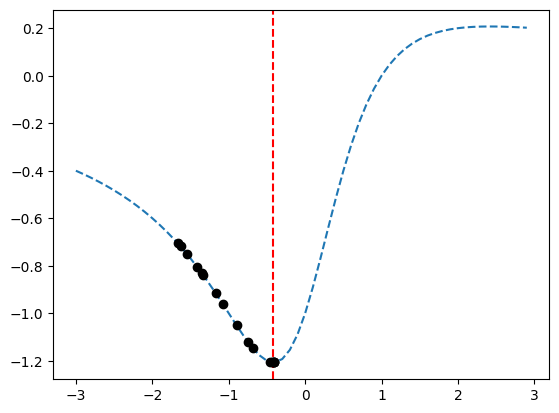

In [6]:
# hill climbing search de una funcion objetivo unidimensional
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# funcion objetivo
def objective(x):
	return (x[0]-1)/((x[0]**2)+1) 

# algoritmo hill climb
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generar punto inicial
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluar punto inicial
	solution_eval = objective(solution)
	# correr algoritmo
	solutions = list()
	solutions.append(solution)
	for i in range(n_iterations):
		# ejecutar un paso
		candidate = solution + randn(len(bounds)) * step_size
		# evaluar el punto en el que estamos
		candidte_eval = objective(candidate)
		# revisar si deberiamos conservar el punto
		if candidte_eval <= solution_eval:
			# guardar el punto 
			solution, solution_eval = candidate, candidte_eval
			# memoria
			solutions.append(solution)
			# progreso
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval, solutions]

# generador de numero aleatorio
seed(5)
# definir rango
bounds = asarray([[-3.0, 3.0]])
# definir total de iteraciones
n_iterations = 100
# tamaño de paso maximo
step_size = 0.1
# algoritmo
best, score, solutions = hillclimbing(objective, bounds, n_iterations, step_size)
print('Hecho!')
print('f(%s) = %f' % (best, score))
# muestrear los candidatos cada tamaño de paso
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# crear grafica de input vs resultado
pyplot.plot(inputs, [objective([x]) for x in inputs], '--')
# dibujar linea en el punto optimo (opcional)
pyplot.axvline(x=best, ls='--', color='red') 
# plottear muestras
pyplot.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
pyplot.show()

Ejercicio

1. Cambiar la funcion objetivo con otro minimo local, ejemplo $x^{3}-3x^{2} +x$
2. CAmbia el tamaño de paso a 0.5 y observa que pasa.